#001

In [1]:
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import numpy as np
from bert4keras.models import build_transformer_model
from bert4keras.tokenizers import Tokenizer
from bert4keras.snippets import to_array
from bert4keras.models import build_transformer_model
from bert4keras.tokenizers import Tokenizer
from bert4keras.snippets import to_array
path = u"./dataset/002.srt"
x = pd.read_csv(path, sep='\n')
y = np.array(x)

z = []
z.append(np.array(['1']))
for i in y:
    z.append(i)

for i in z:
    print(i)

s = ""
idx = 0
subPack = []
pack = []
for i in z:
    subPack.append(i[0])
    idx += 1
    if(idx % 3 == 0):
        pack.append(subPack)
        subPack = []
        idx = 0

start = []
end = []
for i in range(len(pack)):
    s = pack[i][1]
    s = s.replace(" --> ", "")
    s = s[0:8], s[12:20]
    a = list(s)
    pack[i][1] = a


['1']
['00:00:00,160 --> 00:00:02,510']
['核能發電到底是不是一個安全的技術呢']
['2']
['00:00:02,520 --> 00:00:03,470']
['在核災之後']
['3']
['00:00:03,480 --> 00:00:05,710']
['世界各國的核電發展又是如何呢']
['4']
['00:00:05,750 --> 00:00:07,510']
['廢核是國際趨勢嗎']
['5']
['00:00:07,610 --> 00:00:12,250']
['今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎']
['6']
['00:00:23,550 --> 00:00:24,200']
['hello  大家好']
['7']
['00:00:24,210 --> 00:00:26,120']
['我是自己換回到2021公投']
['8']
['00:00:26,130 --> 00:00:26,530']
['只能哦']
['9']
['00:00:26,540 --> 00:00:27,940']
['這是這個系列的第4集']
['10']
['00:00:27,970 --> 00:00:31,000']
['那我們在前幾天已經談過公投要不要綁大選']
['11']
['00:00:31,010 --> 00:00:33,500']
['藻礁公投還有萊豬公投的3個議題']
['12']
['00:00:33,530 --> 00:00:34,800']
['那如果你還沒看完']
['13']
['00:00:34,830 --> 00:00:36,760']
['歡迎你有看完今天的影片之後呢']
['14']
['00:00:36,770 --> 00:00:38,920']
['回去看一看那今天這一集是第4集']
['15']
['00:00:38,930 --> 00:00:39,690']
['我們要來討論的']
['16']
['00:00:39,700 --> 00:00:41,880']
['是第十七案重啟核四公投']
['17']
['00:00:41,910 --> 00:00:44,820']
['不過我們發現這個議題比想像中還要複雜很多']
['18']
['00:00

In [2]:



config_path = "./model/bert_base/chinese_L-12_H-768_A-12/bert_config.json"
checkpoint_path = './model/bert_base/chinese_L-12_H-768_A-12/bert_model.ckpt'
dict_path = './model/bert_base/chinese_L-12_H-768_A-12/vocab.txt'

model = build_transformer_model(
    config_path=config_path, checkpoint_path=checkpoint_path, with_nsp=True
)
tokenizer = Tokenizer(dict_path, do_lower_case=True)

token = []
seg = []
token_ids = ""
segment_ids = ""
result = []

for i in range(len(pack)-1):
    if (len(pack[i][2])+len(pack[i+1][2]) >= 512):
        pack[i][2] = pack[i][2][-128:]

    token_ids, segment_ids = tokenizer.encode(
        pack[i][2], pack[i+1][2])

    token_ids, segment_ids = to_array([token_ids], [segment_ids])

    probas = model.predict([token_ids, segment_ids])[0]
    
    result.append(probas)



for i in range(len(pack)-1):
    pack[i].append(result[i][0])

idxList = []
lessThanHalf = []
lessThanHalf.append('00:00:00')
for i in range(len(pack)-1):
    if(pack[i][3] < 0.2):
        idxList.append(i)
        lessThanHalf.append(pack[i][1][1])

combineText = []
j = ''
j = pack[0][2]
for i in range(len(pack)-1):
    token_testId, Seg_testId = tokenizer.encode(pack[i][2], pack[i+1][2])
    token_testId, Seg_testId = to_array([token_testId], [Seg_testId])
    result = model.predict([token_testId, Seg_testId])[0][0]

    
    if(result > 0.5):
        j += pack[i+1][2]
        if(i == len(pack)-2):
            j = pack[i+1][2]
            combineText.append(j)
            j = ""
    else:
        j += pack[i+1][2]

        combineText.append(j)
        j = ""


In [3]:
aa = ""
bb = []
for i in range(len(pack)-1):
    

    if len(aa) == 0:
        aa = pack[i][2]

    if (pack[i][-1] >= 0.5):
        aa += pack[i+1][2]
    else:
        bb.append(aa)
        aa = ""

    if (i == len(pack)-2):
        # print(0)
        if len(aa) != 0:
            bb.append(aa)
        else:
            bb.append(pack[i+1][2])
combineText = bb


In [4]:
wst = []
for sentence in combineText:
    seq_list = jieba.lcut(sentence)
    wst.append(seq_list)

TF = np.zeros((np.shape(wst)[0], 20))

combineStr = "".join(combineText)


Query = jieba.analyse.extract_tags(
    combineStr, topK=20, withWeight=False, allowPOS=('n'))

for i in range(len(Query)):
    for j in range(len(wst)):
        for k in range(len(wst[j])):
            if(Query[i] == wst[j][k]):
                TF[j][i] = 1
                continue

keyWord = []
deliver = []
for i in TF:
    for j in range(len(i)):
        if(i[j]):
            deliver.append(Query[j])
    keyWord.append(deliver)
    deliver = []

finalResult = []
tmpProcess = []
for i in range(len(combineText)):
    tmpProcess.append(lessThanHalf[i])
    # tmpProcess.append(lessThanHalf[i+1])
    tmpProcess.append(combineText[i])
    tmpProcess.append(keyWord[i])
    finalResult.append(tmpProcess)
    tmpProcess = []


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\SELAB-~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.931 seconds.
Prefix dict has been built successfully.


In [5]:

config_path = "./model/bert_base/chinese_L-12_H-768_A-12/bert_config.json"
checkpoint_path = './model/bert_base/chinese_L-12_H-768_A-12/bert_model.ckpt'
dict_path = './model/bert_base/chinese_L-12_H-768_A-12/vocab.txt'

model = build_transformer_model(
    config_path, 
    checkpoint_path
)
tokenizer = Tokenizer(dict_path, do_lower_case=True)

In [6]:
SS=""

for i in range(len(finalResult)):
    SS=SS.join(finalResult[i][2])
    token_ids, segment_ids = tokenizer.encode(SS)
    token_ids, segment_ids = to_array([token_ids], [segment_ids])  
    finalResult[i].append(model.predict([token_ids, segment_ids])[0][0])
    #print(model.predict([token_ids, segment_ids])[0][0])
    SS=""

核能趨勢核災核電國際大家

議題影片
核能議題
核能趨勢核電廠核災大家
影音作者
趨勢影音作者協會內容
作者協會內容大家影片
廢料核能核電廠核廢料燃料放射性能量
廢料核電廠


In [7]:
def Euclidean_Distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))
for i in range(len(finalResult)-1):
    finalResult[i].append(Euclidean_Distance(finalResult[i][3],finalResult[i+1][3]))

In [8]:
trueFinalResult = []
trueText = ""
tureTime = ''
trueKW = []
first = 0
for i in range(len(finalResult)-1):
    
    if len(trueText) == 0:
        tureTime = finalResult[i][0]
        trueText = finalResult[i][1]
        trueKW = finalResult[i][2]

    if (finalResult[i][-1] <= 15 or len(finalResult[i][2])==0):
        trueText += finalResult[i+1][1]
        trueKW = list(set(trueKW).union(set(finalResult[i+1][2])))
        
    else:
        trueFinalResult.append([tureTime,
                                trueText,
                                trueKW
                                ])
        trueText = ""
        tureTime = ''
        trueKW = []
        
    
    if i==len(finalResult)-1:
        if len(trueText) != 0:
            trueFinalResult.append([tureTime,
                                trueText,
                                trueKW
                                ])
                
        else:
            
            tureTime = finalResult[i+1][0]
            trueText = finalResult[i+1][1]
            trueKW = finalResult[i+1][2]
            trueFinalResult.append([tureTime,
                                trueText,
                                trueKW
                                ])
            trueText = ""
            tureTime = ''
            trueKW = []
               
    

    
trueFinalResult

[['00:00:00',
  '核能發電到底是不是一個安全的技術呢在核災之後世界各國的核電發展又是如何呢廢核是國際趨勢嗎今天我們透過重啟核四公投來聊聊核電究竟安不安全嗎hello  大家好我是自己換回到2021公投只能哦',
  ['核能', '趨勢', '核災', '核電', '國際', '大家']],
 ['00:00:26',
  '這是這個系列的第4集那我們在前幾天已經談過公投要不要綁大選藻礁公投還有萊豬公投的3個議題那如果你還沒看完歡迎你有看完今天的影片之後呢回去看一看那今天這一集是第4集我們要來討論的是第十七案重啟核四公投不過我們發現這個議題比想像中還要複雜很多我們必須要先弄清楚許多關於核能還有盒子的資訊才有辦法進入後續的討論所以這個主題呢我們會切分成上下兩集今天這一集我們會先來跟大家介紹核電廠揪竟安全過去的核災是怎麼回事也會聊到國際合的趨勢以及臺灣的核能發展現況那明天我們就會正式進入這一次核四公投的正反意見討論  當然照慣例哦在開始之前呢還是要先進一段工商服務時間',
  ['影片', '核能', '趨勢', '議題', '核電廠', '大家', '核災']],
 ['00:01:10',
  '臺灣第一場專門為youtube影音創作者舉辦年會fip即將登場嘍不然你是剛踏入youtube圈還再努力殺出重圍或者是已經有點成果正在思考變現或其他問題的創作者這場年會都會幫助你突破困境明確的知道下一步要怎麼走這種年會由臺灣新媒體影音創作者協會主辦喔串聯了多位頂尖創作者一起分享他們在內容策略個人發展影音趨勢以及商業洞察的經驗和觀點除此之外呢協會還邀請到youtube官方代表和ip為大家提供最準確的平臺動向和建議那如果你還沒創作者但正在準備入行或者是有興趣了解當然也能參加  而像年會呢將在2022年的1月10日登場除了現場席位呢也有線上影片票可以讓大家遠端參與目前優惠票種自然熱烈的範疇當中那因為數量有限所以有幸確認請點擊下方的諮詢連接了解更詳細的活動內容後速速報名他',
  ['影片', '趨勢', '大家', '協會', '影音', '作者', '內容']]]

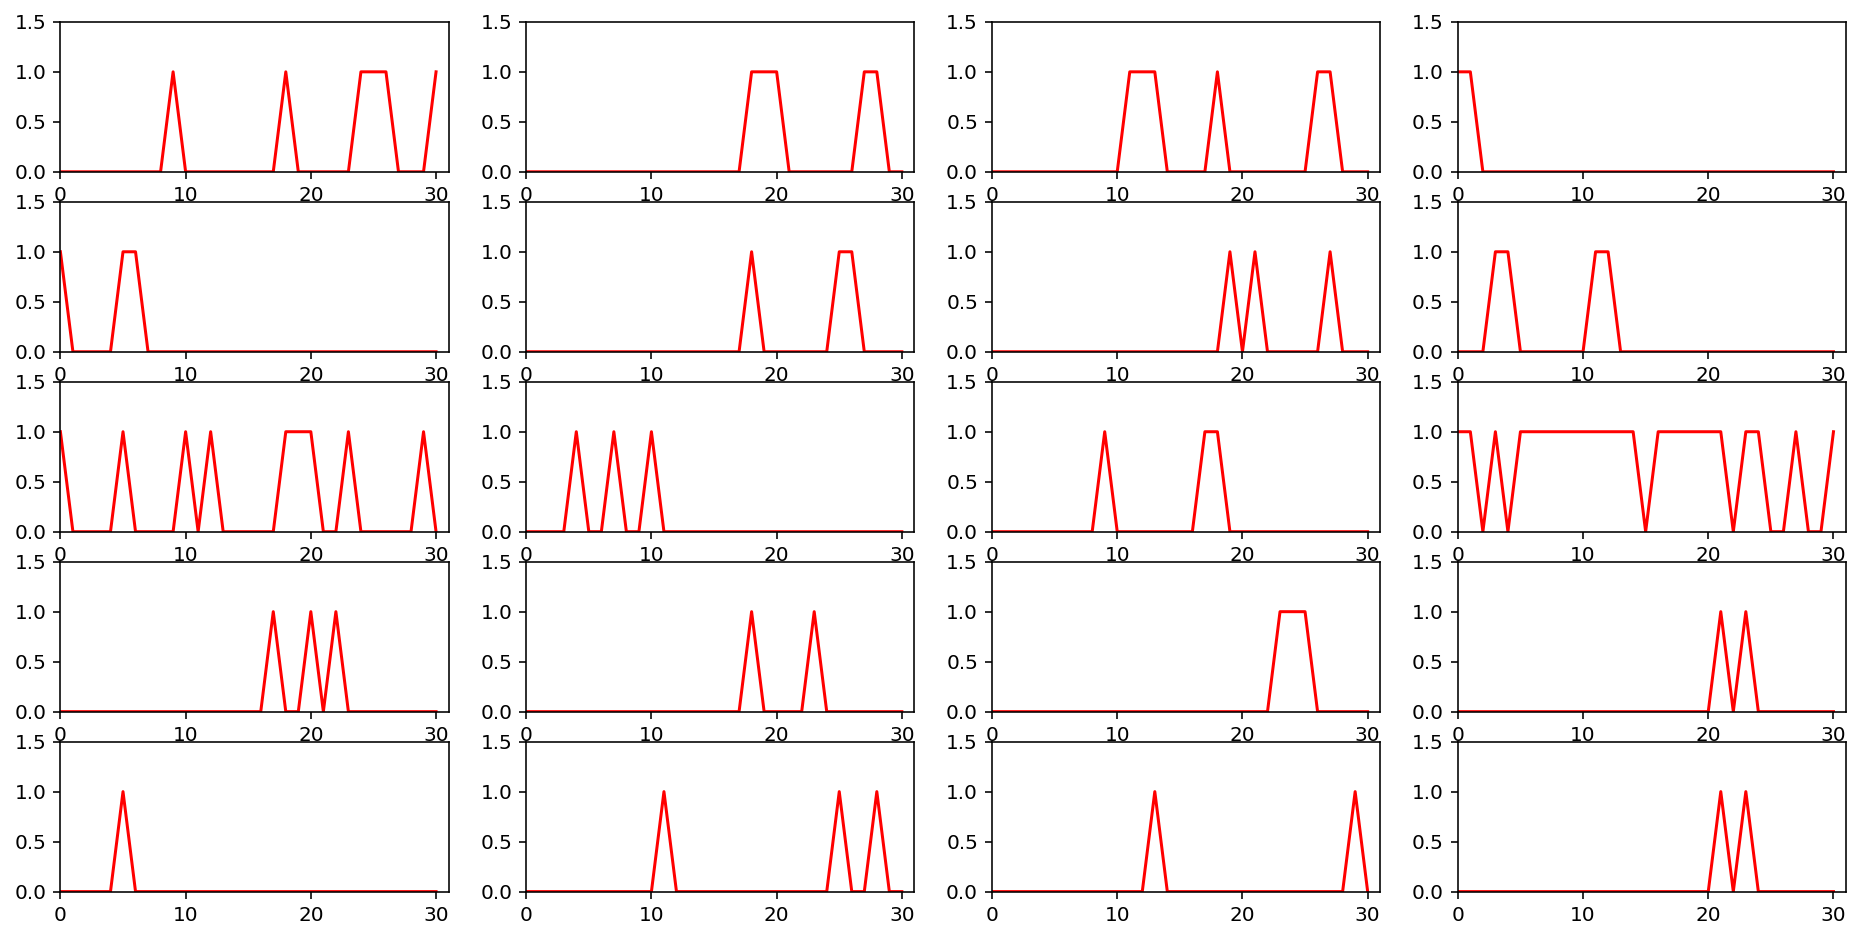

In [196]:
# import matplotlib.pyplot as plt 
# plt.figure(figsize=(16,8),dpi=144)
# for i in range(len(TF)):
#     plt.subplot(5,4,i+1)
#     plt.xlim(0,31)
#     plt.ylim(0,1.5)
#     plt.plot(TF[i],color="red")
# plt.show()